In [2]:
import pandas
import math
import numpy
data_frame = pandas.read_csv("Dataset/engine_work_orders_with_labour_hrs.csv")
data_frame

,Machine Type,Main Part Replaced,Assigned Maintenance Person,Labour Hours
0,TRUCK 001,Engine,Donald Knuth,11
1,TRUCK 001,Engine,Donald Knuth,14
2,TRUCK 001,Engine,Donald Knuth,13
3,TRUCK 001,Engine,Donald Knuth,14
4,TRUCK 001,Engine,Donald Knuth,14
5,TRUCK 001,Engine,Donald Knuth,14
6,TRUCK 001,Engine,Donald Knuth,13
7,TRUCK 001,Engine,John Carmack,10
8,TRUCK 001,Engine,John Carmack,9
9,TRUCK 001,Engine,John Carmack,12


In [3]:
donald=[]
john=[]
donald_jobs=len(data_frame[data_frame['Assigned Maintenance Person']== "Donald Knuth"])
john_jobs=len(data_frame[data_frame['Assigned Maintenance Person']== "John Carmack"])
for i in range(donald_jobs):
    donald.append(data_frame['Labour Hours'].values[i])
for i in range(7,7+john_jobs):
    john.append(data_frame['Labour Hours'].values[i])
donald_mean=numpy.mean(donald)
john_mean=numpy.mean(john)
print('Mean time taken:')
print('Donald Knuth:'+str(donald_mean)[:4])
print('John Carmack:'+str(john_mean)[:4])
maximum=(max(donald_mean,john_mean))
if maximum==john_mean:
    print('Therefore Donald was the quickest ')
else:
    print('Therefore John was the quickest')



Mean time taken:
Donald Knuth:13.2
John Carmack:22.5
Therefore Donald was the quickest 


In [4]:
#Median including outliers
donald=sorted(donald)
donald_median=donald[int(len(donald)/2)]
john=sorted(john)
john_median=john[int(len(john)/2)]
print('Median time taken(including outliers):')
print('Donald Knuth:'+str(donald_median))
print('John Carmack:'+str(john_median))

Median time taken(including outliers):
Donald Knuth:14
John Carmack:10


In [5]:
#OUTLIERS
john_std = numpy.std(john)
print('JOHN: ' + str(john))
john_clean=john.copy()

for i in range(len(john)):
    if john[i]> john_mean + john_std  or  john[i]< john_mean- john_std:
        print(str(john[i]) + " is an outlier")
        del john_clean[i]
print("With outliers removed: " + str(john_clean))

donald_std = numpy.std(donald)
print('JOHN: ' + str(donald))
donald_clean=donald.copy()

for i in range(len(donald)):
    if donald[i]> donald_mean + donald_std  or  donald[i]< donald_mean- donald_std:
        print(str(donald[i]) + " is an outlier")
        del donald_clean[i]
print("With outliers removed: " + str(donald_clean)) 



    

JOHN: [9, 9, 9, 10, 10, 12, 99]
99 is an outlier
With outliers removed: [9, 9, 9, 10, 10, 12]
JOHN: [11, 13, 13, 14, 14, 14, 14]
11 is an outlier
With outliers removed: [13, 13, 14, 14, 14, 14]


In [6]:
#Outliers using function 'clean()' which takes the list, their name, sd and mean as parameters
def clean(name, array,mean,std):
    print(name + ': ' + str(array))
    array_clean = array.copy()
    
    for i in range(len(array)):
        if array[i]> mean + std  or  array[i]< mean- std:
            print(str(array[i]) + " is an outlier")
            del array_clean[i]
    print("With outliers removed: " + str(array_clean))
    return array_clean

john_clean = clean("John", john,john_mean,john_std)
donald_clean = clean("Donald", donald,donald_mean,donald_std)


John: [9, 9, 9, 10, 10, 12, 99]
99 is an outlier
With outliers removed: [9, 9, 9, 10, 10, 12]
Donald: [11, 13, 13, 14, 14, 14, 14]
11 is an outlier
With outliers removed: [13, 13, 14, 14, 14, 14]


In [7]:
john_clean_mean = numpy.mean(john_clean)
donald_clean_mean = numpy.mean(donald_clean)
john_clean_median = numpy.median(john_clean)
donald_clean_median = numpy.median(donald_clean)
print(john_clean_mean)
print(john_clean_median)
print(donald_clean_mean)
print(donald_clean_median) 


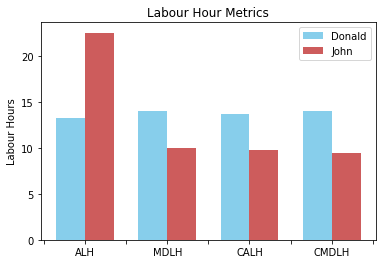

In [11]:
# QUESTION 7

donald_metrics = (13.2857, 14, 13.6667, 14)
john_metrics = (22.5714, 10, 9.833, 9.5)

ind = np.arange(len(donald_metrics))  
width = 0.35  

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, donald_metrics, width,
                color='SkyBlue', label='Donald')
rects2 = ax.bar(ind + width/2, john_metrics, width,
                color='IndianRed', label='John')


ax.set_ylabel('Labour Hours')
ax.set_title('Labour Hour Metrics')
ax.set_xticklabels(('', '', 'ALH', '',  'MDLH','', 'CALH', '', 'CMDLH'))

ax.legend()
    

    
